## Importing the dataset from Kaggle

###Csak akkor lesz sikeres az adathalmaz betöltése, ha fel van töltve a colab-ba a kaggle.json fájl helyes adatokkal. (különben a harmadik cella errort dob)
https://www.kaggle.com/docs/api#authentication

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("joelljungstrom/128k-airline-reviews")
path = "/root/.cache/kagglehub/datasets/joelljungstrom/128k-airline-reviews/versions/1"
print("Path to dataset files:", path)

100%|██████████| 41.6M/41.6M [00:00<00:00, 49.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/joelljungstrom/128k-airline-reviews/versions/1


In [ ]:
# prompt: show a few lines of the imported dataset and loat it into a dataframe name df

import pandas as pd
import os


csv_file_path = os.path.join(path, "AirlineReviews.csv")

try:
    df = pd.read_csv(csv_file_path)
    print(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {csv_file_path}. Check the dataset contents.")
except Exception as e:
    print(f"An error occurred: {e}")

        Aircraft    AirlineName      CabinType      DateFlown  \
0            NaN    AB Aviation  Economy Class  November 2019   
1           E120    AB Aviation  Economy Class      June 2019   
2  Embraer E120     AB Aviation  Economy Class      June 2019   
3            NaN  Aerocaribbean  Economy Class            NaN   
4            NaN  Aerocaribbean            NaN            NaN   

              DatePub  EntertainmentRating  FoodRating  GroundServiceRating  \
0  11th November 2019                    0           4                    4   
1      25th June 2019                    0           1                    1   
2      25th June 2019                    0           1                    1   
3  31st December 2010                    0           0                    0   
4  25th November 2010                    0           0                    0   

   OriginCountry  OverallScore  ...                Route SeatComfortRating  \
0    Netherlands           9.0  ...     Moroni to Moheli

In [ ]:
df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633


In [ ]:
# prompt: write python code to count how many times each airline name appears in the AirlineName column of the already loaded df dataset and display them each in a single line like: airline name, number. in a new print display the number of unique airline names. After that put the printed text in an array of airline names that contains each airline name from most popular to least popular sorted by how many times they appear in the original dataset

import pandas as pd

airline_counts = df['AirlineName'].value_counts()

#for airline, count in airline_counts.items():
#  print(f"{airline}, {count}")

print(f"\nNumber of unique airline names: {len(airline_counts)}")

sorted_airline_names = airline_counts.index.tolist()



Number of unique airline names: 547


Itt állítható hogy hány darab kevés visszajelzéssel rendlekző légi társaság rekordjai legyenek törölve.

In [ ]:
# prompt: create a list of the last 200 elements of sorted_airline_names

last_200_airlines = sorted_airline_names[-500:]


In [ ]:
# prompt: remove every record from df where airlineName is contained by last_200_airlines but if the airlineName is not contained then keep the record as is

import pandas as pd

# Use the isin() method for efficient filtering
df = df[~df['AirlineName'].isin(last_200_airlines)]



In [ ]:
# prompt: new task: replace each airlineName with the index of airlineName in sorted_airline_names list

# Create a dictionary to map airline names to their index in the sorted list
airline_name_to_index = {airline: index for index, airline in enumerate(sorted_airline_names)}

# Replace airline names with their indices
df['AirlineName'] = df['AirlineName'].map(airline_name_to_index)

# Display or use the modified DataFrame
df.head()

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
726,Airbus,37,Economy Class,May 2023,8th May 2023,0,2,5,Ireland,10.0,...,Dublin to Dublin via Alicante airport,2,5,aer-lingus,Very pleasant staff,Couple Leisure,Trip Verified,5,0,176748b8-ddb9-4bfe-8b98-ceef1ae10834
755,NaN,37,Economy Class,August 2022,1st May 2023,4,4,1,Canada,3.0,...,Toronto to London via Dublin,4,4,aer-lingus,"they've gone so downhill""",Family Leisure,Not Verified,3,2,d66f7755-b361-41ba-a452-184ace9743a4
756,A330,37,Economy Class,April 2023,27th April 2023,0,0,1,UnitedStates,1.0,...,Hartford to Dublin,1,1,aer-lingus,the online booking is a joke,Solo Leisure,Not Verified,1,0,f83e9c2c-48ff-49ee-8c0d-4f70f66018ad
757,NaN,37,Economy Class,April 2023,15th April 2023,0,3,5,UnitedKingdom,9.0,...,London Heathrow to Shannon,5,4,aer-lingus,"announcement spoken too rapidly""",Solo Leisure,Not Verified,5,0,211b0904-8d72-49a2-8fc6-aa113b7ccd12
758,A321,37,Economy Class,April 2023,15th April 2023,1,1,1,UnitedKingdom,1.0,...,Gatwick to Orlando via Dublin,1,5,aer-lingus,No value in this airline,Business,Trip Verified,1,0,3fe71e4a-338d-4cd2-ba4d-fdf4ef84cd02


In [ ]:
airline_counts = df['AirlineName'].value_counts()

#for airline, count in airline_counts.items():
#  print(f"{airline}, {count}")

print(f"\nNumber of unique airline names: {len(airline_counts)}")

sorted_airline_names = airline_counts.index.tolist()



Number of unique airline names: 47


In [ ]:
# prompt: show all column names in df

df.Review.head()


,Review
726,Just flown Dublin to Alicante. Couldn't find a...
755,I use to recommend Are Lingus pre covid they h...
756,"I am flying in May, but after dealing with the..."
757,"Very efficient, friendly. Only comment I would..."
758,cAircraft wouldn’t start at Gatwick resulting ...


##Text cleaning

In [ ]:
# prompt: write python code that converts the content of df in the review column to lower case

# Convert the 'Review' column to lowercase
df['Review'] = df['Review'].str.lower()

# Display the first few rows to verify the change


In [ ]:
# prompt: write pyhton code that removes all commas and dots from the review column of df

# Remove commas and dots from the 'Review' column
df['Review'] = df['Review'].str.replace(',', '', regex=False)
df['Review'] = df['Review'].str.replace('.', '', regex=False)



In [ ]:
# prompt: write code that removes every column from df except for AirlineName and Review and unique_id

# Keep only specified columns
df = df[['AirlineName', 'Review']]


Porter stemmer

In [ ]:
# prompt: write code that uses porter stemmer on the second column of df without throwing expected string or bytes-like object

!pip install nltk

import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer

# Create a PorterStemmer object
stemmer = PorterStemmer()

def stem_text(text):
    if isinstance(text, str):  # Check if the input is a string
      words = nltk.word_tokenize(text)
      stemmed_words = [stemmer.stem(word) for word in words]
      return " ".join(stemmed_words)
    else:
      return text # Return the original value if not a string


# Apply the stemming function to the 'Review' column
df['lemmatized_review'] = df['Review'].apply(stem_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordNetLemmatizer

In [ ]:
# prompt: new task: write code that performs lemmatization on the review column of df dataset in as few lines as possible, make sure it does not throw 'float' object has no attribute 'split'

import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    if isinstance(text, str):  # Check if it's a string
        words = text.split()
        lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
        return " ".join(lemmatized_words)
    else:
        return ""  # Return an empty string for non-string values

df['lemmatized_review'] = df['Review'].apply(lemmatize_text)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df = df[['AirlineName', 'lemmatized_review']]

df.head()

,AirlineName,lemmatized_review
726,37,just flown dublin to alicant could n't find a ...
755,37,i use to recommend are lingu pre covid they ha...
756,37,i am fli in may but after deal with the airlin...
757,37,veri effici friendli onli comment i would like...
758,37,caircraft wouldn ’ t start at gatwick result i...


##X and Y data

In [ ]:
X = df['AirlineName'].values
y = df['lemmatized_review'].values
X.shape, y.shape

((79371,), (79371,))

#Vectorization and Modeling

###TFIDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
df['lemmatized_review'] = df['lemmatized_review'].fillna('')
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['lemmatized_review'])


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['AirlineName'])


X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



###Counter vectorization

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf


vectorizer = CountVectorizer(stop_words='english')


X_counts = vectorizer.fit_transform(df['lemmatized_review'])


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['AirlineName'])


X_train, X_temp, y_train, y_temp = train_test_split(X_counts, y_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Ez a sor kiírja a címkék számát ami egyben egyenlő a kimementi réteg neuronjainak számával

In [ ]:
print(len(label_encoder.classes_))

47


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer size matches number of unique airlines in the AirlineName column of the dataset. It is needed because in the records of several airlines were deleted.
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val))


loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 169s 84ms/step - accuracy: 0.5158 - loss: 2.0248 - val_accuracy: 0.8229 - val_loss: 0.6594
Epoch 2/3
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 157s 79ms/step - accuracy: 0.9004 - loss: 0.3889 - val_accuracy: 0.8285 - val_loss: 0.6545
Epoch 3/3
1985/1985 ━━━━━━━━━━━━━━━━━━━━ 161s 81ms/step - accuracy: 0.9496 - loss: 0.2071 - val_accuracy: 0.8157 - val_loss: 0.7306
249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8148 - loss: 0.7248
Test accuracy: 0.8173343539237976


#Tesztelés

In [ ]:
new_review = [""]

# Elfogadható próba visszajelzés: csak angol nyelven, írási hibák nélkül

new_review_tfidf = vectorizer.transform(new_review)
predicted_airline = model.predict(new_review_tfidf)
predicted_airline_label = label_encoder.inverse_transform([predicted_airline.argmax()])
print(f"Predicted Airline percentage, name: ",predicted_airline.max())
print(list(airline_name_to_index.keys())[list(airline_name_to_index.values()).index(predicted_airline_label[0])])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted Airline percentage, name:  0.25643972
Turkish Airlines


##Különböző értékekkel elért eredmények:

|First layer neurons   |  Second layer neurons | Vectorization type  | Epoch  | Accuracy  |
|---|---|---|---|---|
| 128  |  64 | tfidf  | 3  | 0.8148148059844971  |
|  128 | 128  |  tfidf | 3  | 0.8107835650444031  |
|  128 | 32  | tfidf  |  3 | 0.8100277185440063  |
| 256  |  64 | tfidf  |  3 | 0.8068783283233643  |
| 64  |  64 | tfidf  |  3 | 0.8071302771568298  |
| 128  |  64 | cv  |  3 | 0.8125472664833069  |
| 128  |  64 | tfidf, porter stemmer  |  3 | 0.8173343539237976  |


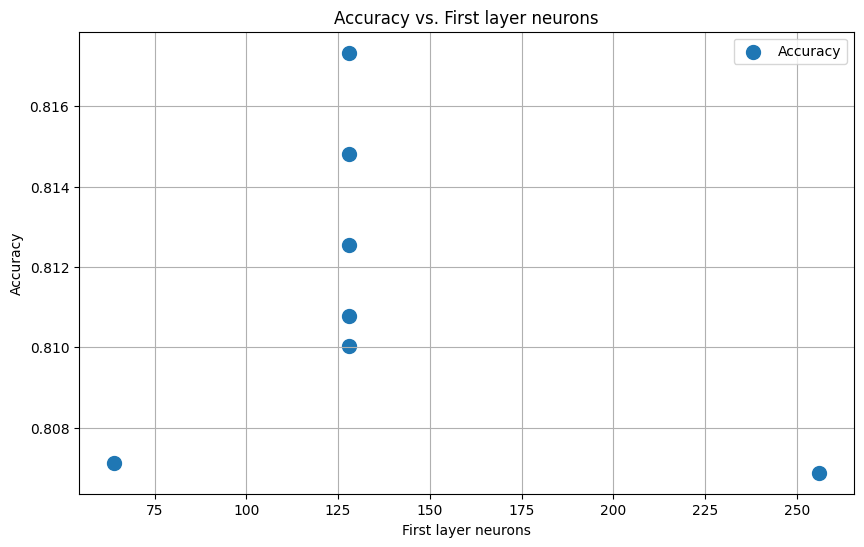

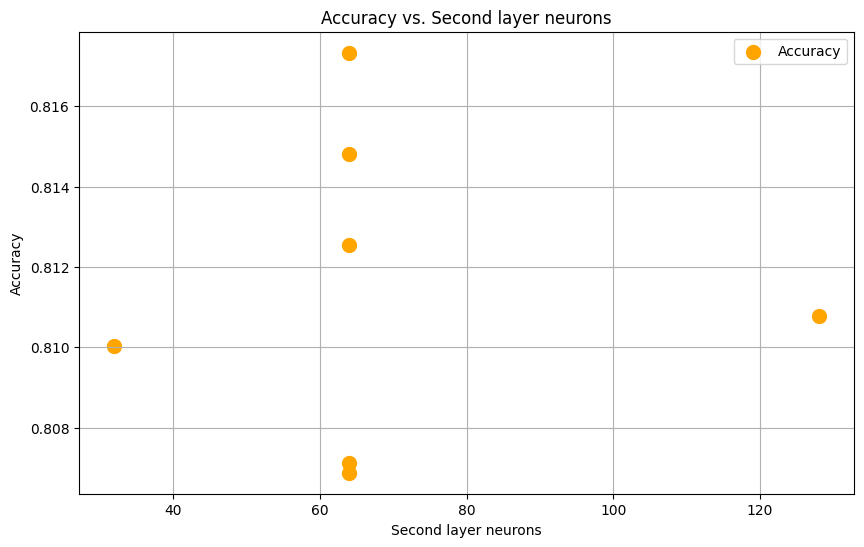

In [ ]:
#gemini: make two plots the first showing the number of first layelr neurons and the second showing the number of the second layer neurons

import matplotlib.pyplot as plt
import pandas as pd

data = {
    'First layer neurons': [128, 128, 128, 256, 64, 128, 128],
    'Second layer neurons': [64, 128, 32, 64, 64, 64, 64],
    'Vectorization type': ['tfidf', 'tfidf', 'tfidf', 'tfidf', 'tfidf', 'cv', 'tfidf, porter stemmer'],
    'Epoch': [3, 3, 3, 3, 3, 3, 3],
    'Accuracy': [0.8148148059844971, 0.8107835650444031, 0.8100277185440063, 0.8068783283233643, 0.8071302771568298, 0.8125472664833069, 0.8173343539237976]
}

df = pd.DataFrame(data)

# Create the first plot (First layer neurons vs. Accuracy)
plt.figure(figsize=(10, 6))
plt.scatter(df['First layer neurons'], df['Accuracy'], marker='o', label='Accuracy', s=100)
plt.xlabel('First layer neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. First layer neurons')
plt.legend()
plt.grid(True)
plt.show()

# Create the second plot (Second layer neurons vs. Accuracy)
plt.figure(figsize=(10, 6))
plt.scatter(df['Second layer neurons'], df['Accuracy'], marker='o', label='Accuracy', s=100, color='orange')  # Changed color for distinction
plt.xlabel('Second layer neurons')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Second layer neurons')
plt.legend()
plt.grid(True)
plt.show()

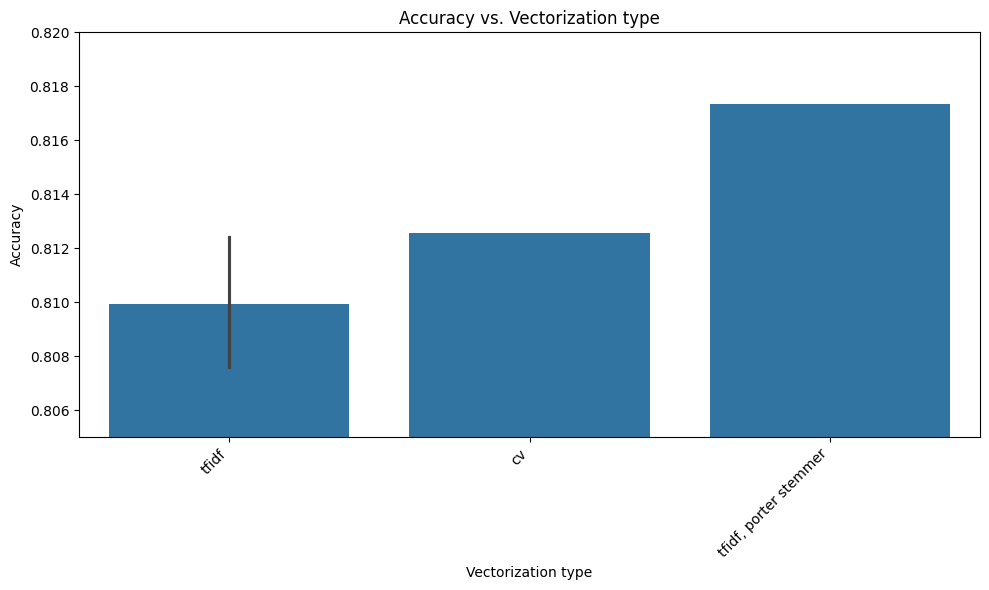

In [ ]:
#gemini: also make a simular plot but show the differneces of the vectorization type but keep in mind that the value differnces are very small

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = {
    'First layer neurons': [128, 128, 128, 256, 64, 128, 128],
    'Second layer neurons': [64, 128, 32, 64, 64, 64, 64],
    'Vectorization type': ['tfidf', 'tfidf', 'tfidf', 'tfidf', 'tfidf', 'cv', 'tfidf, porter stemmer'],
    'Epoch': [3, 3, 3, 3, 3, 3, 3],
    'Accuracy': [0.8148148059844971, 0.8107835650444031, 0.8100277185440063, 0.8068783283233643, 0.8071302771568298, 0.8125472664833069, 0.8173343539237976]
}

df = pd.DataFrame(data)

# Create the plot (Vectorization type vs. Accuracy)
plt.figure(figsize=(10, 6))
sns.barplot(x='Vectorization type', y='Accuracy', data=df)
plt.xlabel('Vectorization type')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Vectorization type')
plt.xticks(rotation=45, ha='right')

# Set y-axis limits to highlight small differences
plt.ylim(0.805, 0.82)  # Adjust limits as needed

plt.tight_layout()
plt.show()